**Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling**

**1) Build a deep learning model to predict churn rate at bank.**

**2) Once model is built, print classification report and analyze precision, recall and f1-score** 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [2]:
df=pd.read_csv('Bank_Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df.drop('CustomerId',axis='columns',inplace=True)

In [4]:
df.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.dtypes

RowNumber            int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.isnull().sum()

RowNumber          0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#changing Column Name Exited to Churn 
df.rename(columns={"Exited":"Churn"}, inplace=True)
df['Churn'].replace({1:'Yes',0:'No'},inplace=True)
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [8]:
df.head(20)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,Yes
1,2,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,No
2,3,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,Yes
3,4,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,No
4,5,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,No
5,6,Chu,645,Spain,0,44,8,113755.78,2,1,0,149756.71,Yes
6,7,Bartlett,822,France,0,50,7,0.00,2,1,1,10062.80,No
7,8,Obinna,376,Germany,1,29,4,115046.74,4,1,0,119346.88,Yes
8,9,He,501,France,0,44,4,142051.07,2,0,1,74940.50,No
9,10,H?,684,France,0,27,2,134603.88,1,1,1,71725.73,No


In [9]:
df[df.Churn=='Yes']

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,Yes
2,3,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,Yes
5,6,Chu,645,Spain,0,44,8,113755.78,2,1,0,149756.71,Yes
7,8,Obinna,376,Germany,1,29,4,115046.74,4,1,0,119346.88,Yes
16,17,Romeo,653,Germany,0,58,1,132602.88,1,1,0,5097.67,Yes
22,23,Gerasimov,510,Spain,1,38,4,0.00,1,1,0,118913.53,Yes
30,31,Azikiwe,591,Spain,1,39,3,0.00,3,1,0,140469.38,Yes
35,36,Lombardo,475,France,1,45,0,134264.04,1,1,0,27822.99,Yes
41,42,Clarke,465,France,1,51,8,122522.32,1,0,0,181297.65,Yes
43,44,Lavine,834,France,1,49,2,131394.56,1,0,0,194365.76,Yes


In [10]:
df[df.Churn=='No']

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
1,2,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,No
3,4,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,No
4,5,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,No
6,7,Bartlett,822,France,0,50,7,0.00,2,1,1,10062.80,No
8,9,He,501,France,0,44,4,142051.07,2,0,1,74940.50,No
9,10,H?,684,France,0,27,2,134603.88,1,1,1,71725.73,No
10,11,Bearce,528,France,0,31,6,102016.72,2,0,0,80181.12,No
11,12,Andrews,497,Spain,0,24,3,0.00,2,1,0,76390.01,No
12,13,Kay,476,France,1,34,10,0.00,2,1,0,26260.98,No
13,14,Chin,549,France,1,25,5,0.00,2,0,0,190857.79,No


In [11]:
df.columns

Index(['RowNumber', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

**Data Visulization**

C:\Users\Laukit\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


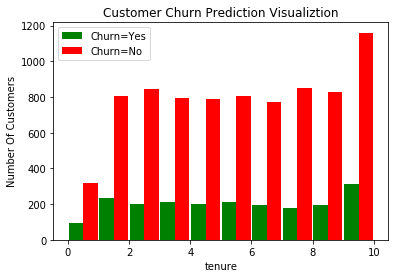

In [12]:
tenure_churn_no = df[df.Churn=='No'].Tenure
tenure_churn_yes = df[df.Churn=='Yes'].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

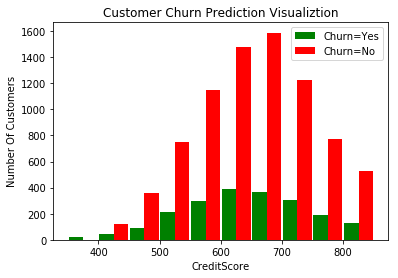

In [13]:
mc_churn_no = df[df.Churn=='No'].CreditScore     
mc_churn_yes = df[df.Churn=='Yes'].CreditScore    

plt.xlabel("CreditScore")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

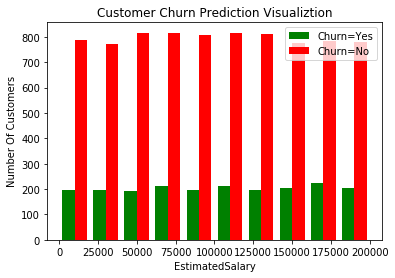

In [14]:
mc_churn_no = df[df.Churn=='No'].EstimatedSalary   
mc_churn_yes = df[df.Churn=='Yes'].EstimatedSalary    

plt.xlabel("EstimatedSalary")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=.80, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [15]:
df['Churn'].replace({'Yes':1,'No':0},inplace=True)

In [16]:
df.head(10)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
5,6,Chu,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1
6,7,Bartlett,822,France,0,50,7,0.00,2,1,1,10062.80,0
7,8,Obinna,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1
8,9,He,501,France,0,44,4,142051.07,2,0,1,74940.50,0
9,10,H?,684,France,0,27,2,134603.88,1,1,1,71725.73,0


In [17]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')
                
print_unique_col_values(df)               

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']


In [18]:
df.drop('RowNumber',axis='columns',inplace=True)

In [19]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [20]:
print_unique_col_values(df)               

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']


In [21]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

In [22]:
df.drop('Surname',axis='columns',inplace=True)

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [24]:
print_unique_col_values(df)   

Geography: ['France' 'Spain' 'Germany']


In [26]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Churn',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [33]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [32]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Churn                  int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [34]:
df1.shape

(10000, 13)

In [36]:
df1.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,0,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,0,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,1,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,0,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,0,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [ ]:
CreditScore, Age ,Tenure ,Balance ,NumOfProducts, EstimatedSalary

In [37]:
cols_to_scale = ['CreditScore', 'Age' ,'Tenure' ,'Balance' ,'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [38]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [39]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [40]:
X_train.shape

(8000, 12)

In [41]:
X_test.shape

(2000, 12)

In [42]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.602,1,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.314,1,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.620,1,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.750,0,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.684,0,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


In [43]:
len(X_train.columns)

12

In [49]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    #keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100) #100 epoch 86% acc 

Epoch 1/100
250/250 [==============================] - 1s 940us/step - loss: 0.5967 - accuracy: 0.6689
Epoch 2/100
250/250 [==============================] - 0s 948us/step - loss: 0.4774 - accuracy: 0.7961
Epoch 3/100
250/250 [==============================] - 0s 904us/step - loss: 0.4668 - accuracy: 0.7980
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.8027
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.8056
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4464 - accuracy: 0.8080
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.8100
Epoch 8/100
250/250 [==============================] - 0s 872us/step - loss: 0.4378 - accuracy: 0.8100
Epoch 9/100
250/250 [==============================] - 0s 819us/step - loss: 0.4347 - accuracy: 0.8139
Epoch 10/100
250/250 [==============================] - 0s 896us/step - loss: 0.4

In [50]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 661us/step - loss: 0.3534 - accuracy: 0.8475


[0.3533797562122345, 0.8475000262260437]

In [57]:
y_pred= model.predict(X_test)
y_pred[:5]

array([[0.03211403],
       [0.07079226],
       [0.05991554],
       [0.06559733],
       [0.06492665]], dtype=float32)

In [58]:
y_predicted = []
for element in y_pred:
    if element > 0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [66]:
y_predicted[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [67]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Churn, dtype: int64

In [69]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.70      0.42      0.53       405

    accuracy                           0.85      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000



Text(69.0, 0.5, 'Truth')

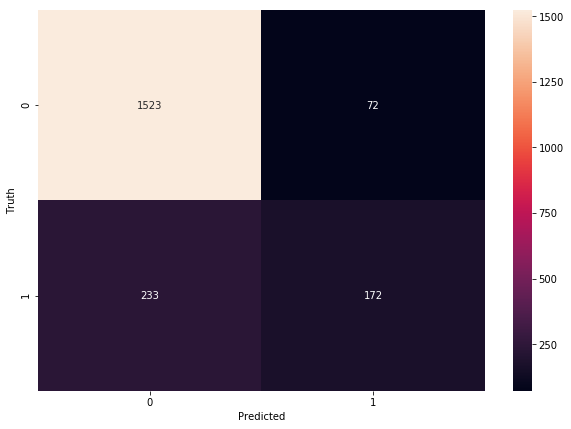

In [70]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')